In [2]:
# For data handling
import pandas as pd
import numpy as np

# For image processing
import os
import cv2
from glob import glob
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning / deep learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

print("Libarary successfully installed")


Libarary successfully installed


In [4]:
skin_df = pd.read_csv("HAM10000\HAM10000_metadata.csv")
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [6]:
skin_df.tail()

,lesion_id,image_id,dx,dx_type,age,sex,localization
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face
10014,HAM_0003521,ISIC_0032258,mel,histo,70.0,female,back


In [8]:
skin_df.shape

(10015, 7)

In [10]:
skin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [12]:
# Check for missing values
skin_df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [14]:
skin_df.isnull().sum()/skin_df.shape[0]*100   #percentage of misiing value

lesion_id       0.000000
image_id        0.000000
dx              0.000000
dx_type         0.000000
age             0.569146
sex             0.000000
localization    0.000000
dtype: float64

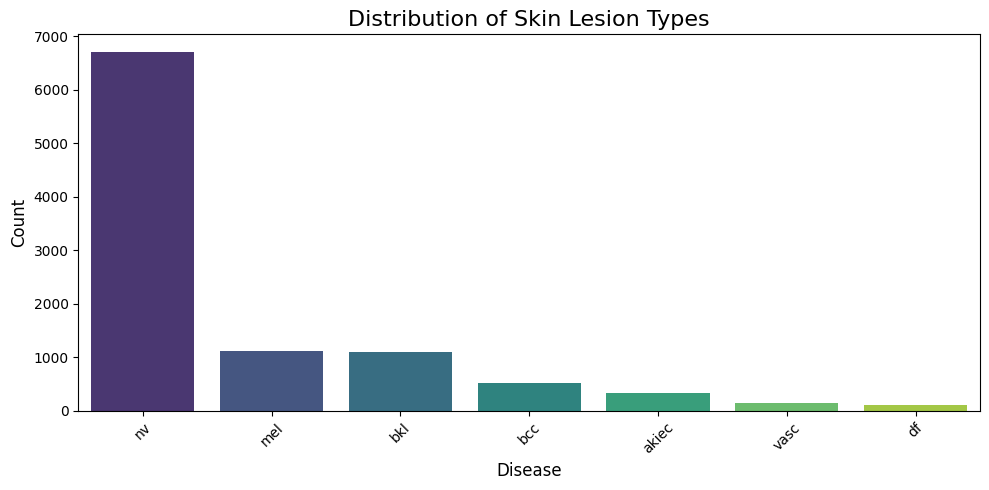

In [16]:
 # Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 5))  
sns.countplot(x='dx', data=skin_df, order=skin_df['dx'].value_counts().index, palette="viridis")  # Ordered by frequency
plt.xlabel("Disease", size=12)  
plt.ylabel("Count", size=12)  
plt.xticks(rotation=45)
plt.title("Distribution of Skin Lesion Types", size=16)
plt.tight_layout()  
plt.show()



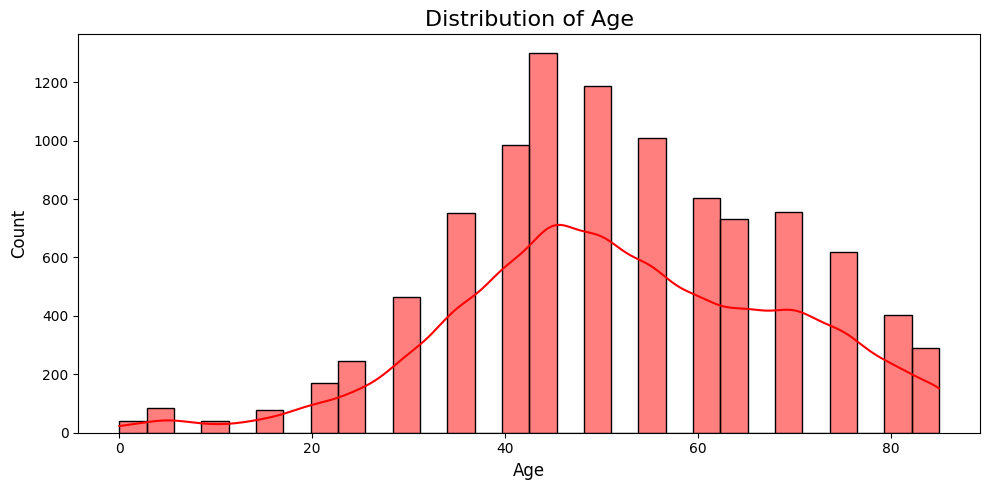

In [18]:

# Set figure size
plt.figure(figsize=(10, 5))

# Plot count of age distribution
sns.histplot(skin_df['age'], bins=30, kde=True, color='RED')  # Histogram for age distribution

# Labels and title
plt.xlabel("Age", size=12)
plt.ylabel("Count", size=12)
plt.title("Distribution of Age", size=16)
plt.tight_layout()
plt.show()

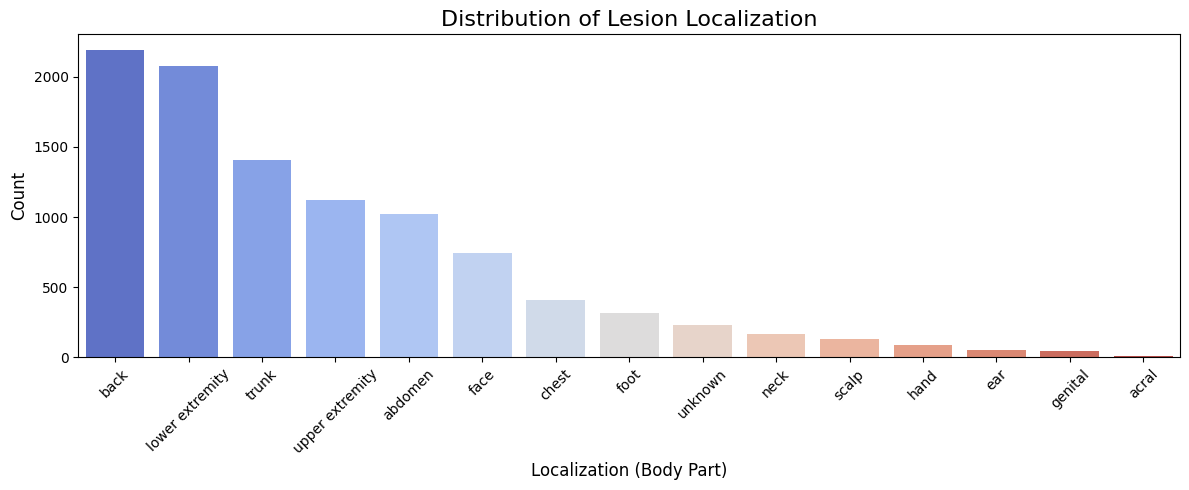

In [20]:
plt.figure(figsize=(12, 5))

# Countplot for localization (ordered by frequency)
sns.countplot(x='localization', data=skin_df, order=skin_df['localization'].value_counts().index, palette="coolwarm")

# Labels and title
plt.xlabel("Localization (Body Part)", size=12)
plt.ylabel("Count", size=12)
plt.xticks(rotation=45)  # Rotate labels to prevent overlap
plt.title("Distribution of Lesion Localization", size=16)
plt.tight_layout()
plt.show()

In [22]:
skin_df.describe().T  # Shows mean, std, min, max values

,count,mean,std,min,25%,50%,75%,max
age,9958.0,51.863828,16.968614,0.0,40.0,50.0,65.0,85.0


In [24]:
 skin_df.describe(include="object")  # Shows counts, unique values, etc.

,lesion_id,image_id,dx,dx_type,sex,localization
count,10015,10015,10015,10015,10015,10015
unique,7470,10015,7,4,3,15
top,HAM_0000835,ISIC_0032258,nv,histo,male,back
freq,6,1,6705,5340,5406,2192


In [26]:
# Example: Fill missing 'age' with mean age
skin_df['age'] = skin_df['age'].fillna(skin_df['age'].mean())


In [28]:
print(skin_df['age'].isnull().sum())
# Output: 0

0


In [30]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
labelEncoder.fit(skin_df['dx'])
skin_df['label']=labelEncoder.transform(skin_df['dx'])

In [32]:
diagnoses = labelEncoder.classes_
encoded_labels = labelEncoder.transform(diagnoses)
diagnosis_mapping = dict(zip(encoded_labels, diagnoses))
for label, diagnosis in diagnosis_mapping.items():
    print(f"Label {label} represents diagnosis: {diagnosis}")


Label 0 represents diagnosis: akiec
Label 1 represents diagnosis: bcc
Label 2 represents diagnosis: bkl
Label 3 represents diagnosis: df
Label 4 represents diagnosis: mel
Label 5 represents diagnosis: nv
Label 6 represents diagnosis: vasc


In [34]:
import os
import pandas as pd

# Paths to image folders
folder1_path = 'HAM10000/HAM10000_images_part_1'
folder2_path = 'HAM10000/HAM10000_images_part_2'

image_mapping = {}

# Iterate over images in folder 1
for filename in os.listdir(folder1_path):
    image_id = filename.split('.')[0]
    image_mapping[image_id] = os.path.join(folder1_path, filename)

# Iterate over images in folder 2
for filename in os.listdir(folder2_path):
    image_id = filename.split('.')[0]
    image_mapping[image_id] = os.path.join(folder2_path, filename)

# Link image paths with metadata
skin_df['image_path'] = skin_df['image_id'].map(image_mapping)

# Show first 5 rows
skin_df.head()


,lesion_id,image_id,dx,dx_type,age,sex,localization,label,image_path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,2,HAM10000/HAM10000_images_part_1\ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,2,HAM10000/HAM10000_images_part_1\ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,2,HAM10000/HAM10000_images_part_1\ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,2,HAM10000/HAM10000_images_part_1\ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,2,HAM10000/HAM10000_images_part_2\ISIC_0031633.jpg


In [36]:
lesion_type_dict = {
    'akiec': 'Actinic keratoses and intraepithelial carcinoma',
    'bcc': 'Basal cell carcinoma',
    'bkl': 'Benign keratosis-like lesions',
    'df': 'Dermatofibroma',
    'mel': 'Melanoma',
    'nv': 'Melanocytic nevi',
    'vasc': 'Vascular lesions'
}

# Create new column with full lesion names
skin_df['lesion_type'] = skin_df['dx'].map(lesion_type_dict)

# Show updated DataFrame
skin_df.head()


,lesion_id,image_id,dx,dx_type,age,sex,localization,label,image_path,lesion_type
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,2,HAM10000/HAM10000_images_part_1\ISIC_0027419.jpg,Benign keratosis-like lesions
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,2,HAM10000/HAM10000_images_part_1\ISIC_0025030.jpg,Benign keratosis-like lesions
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,2,HAM10000/HAM10000_images_part_1\ISIC_0026769.jpg,Benign keratosis-like lesions
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,2,HAM10000/HAM10000_images_part_1\ISIC_0025661.jpg,Benign keratosis-like lesions
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,2,HAM10000/HAM10000_images_part_2\ISIC_0031633.jpg,Benign keratosis-like lesions


In [38]:
import cv2
import numpy as np

# Function use reading and resizing the images
def read_and_resize_image(image_path, target_size=(224, 224)):
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, target_size)
    # Convert BGR to RGB format
    rgb_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
    return rgb_image

# Appliying row wise
skin_df['image_array'] = skin_df['image_path'].apply(lambda x: read_and_resize_image(x))

skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,label,image_path,lesion_type,image_array
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,2,HAM10000/HAM10000_images_part_1\ISIC_0027419.jpg,Benign keratosis-like lesions,"[[[186, 150, 192], [189, 153, 195], [191, 155,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,2,HAM10000/HAM10000_images_part_1\ISIC_0025030.jpg,Benign keratosis-like lesions,"[[[24, 13, 21], [24, 13, 23], [25, 14, 24], [2..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,2,HAM10000/HAM10000_images_part_1\ISIC_0026769.jpg,Benign keratosis-like lesions,"[[[186, 127, 134], [188, 128, 137], [191, 134,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,2,HAM10000/HAM10000_images_part_1\ISIC_0025661.jpg,Benign keratosis-like lesions,"[[[23, 11, 15], [25, 11, 18], [23, 10, 19], [2..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,2,HAM10000/HAM10000_images_part_2\ISIC_0031633.jpg,Benign keratosis-like lesions,"[[[124, 82, 104], [132, 89, 112], [139, 93, 11..."


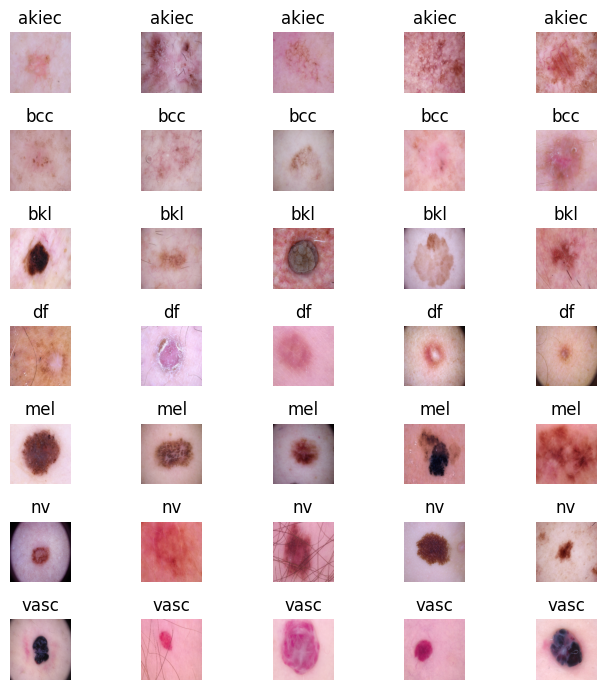

In [40]:
import matplotlib.pyplot as plt
n_samples = 5
# Plotting
fig, maxs = plt.subplots(7, n_samples, figsize=(7, 7))
for n_axs, (type_name, type_rows) in zip(maxs, skin_df.sort_values(['dx']).groupby('dx')):
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image_array'])
        c_ax.axis('off')
        c_ax.set_title(type_name)

plt.tight_layout()
plt.show()

In [42]:
 skin_df['label_str'] = skin_df['label'].astype(str)



In [44]:
 train_df, test_df = train_test_split(skin_df, test_size=0.2, stratify=skin_df['label'], random_state=42)

In [46]:
from sklearn.utils import resample
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

# Step 1: Count each class
class_counts = skin_df['label_str'].value_counts()
max_count = class_counts.max()

# Step 2: Balance the dataset by oversampling minority classes
balanced_df = pd.DataFrame()
for label in class_counts.index:
    subset = skin_df[skin_df['label_str'] == label]
    upsampled = resample(subset, replace=True, n_samples=max_count, random_state=42)
    balanced_df = pd.concat([balanced_df, upsampled])

print("✅ Dataset balanced.")
print(balanced_df['label_str'].value_counts())

# Step 3: Split
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(balanced_df, test_size=0.2, stratify=balanced_df['label_str'], random_state=42)

# Step 4: Define ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Step 5: Create Generators
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image_path',
    y_col='label_str',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='image_path',
    y_col='label_str',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


✅ Dataset balanced.
label_str
5    6705
4    6705
2    6705
1    6705
0    6705
6    6705
3    6705
Name: count, dtype: int64
Found 37548 validated image filenames belonging to 7 classes.
Found 9387 validated image filenames belonging to 7 classes.


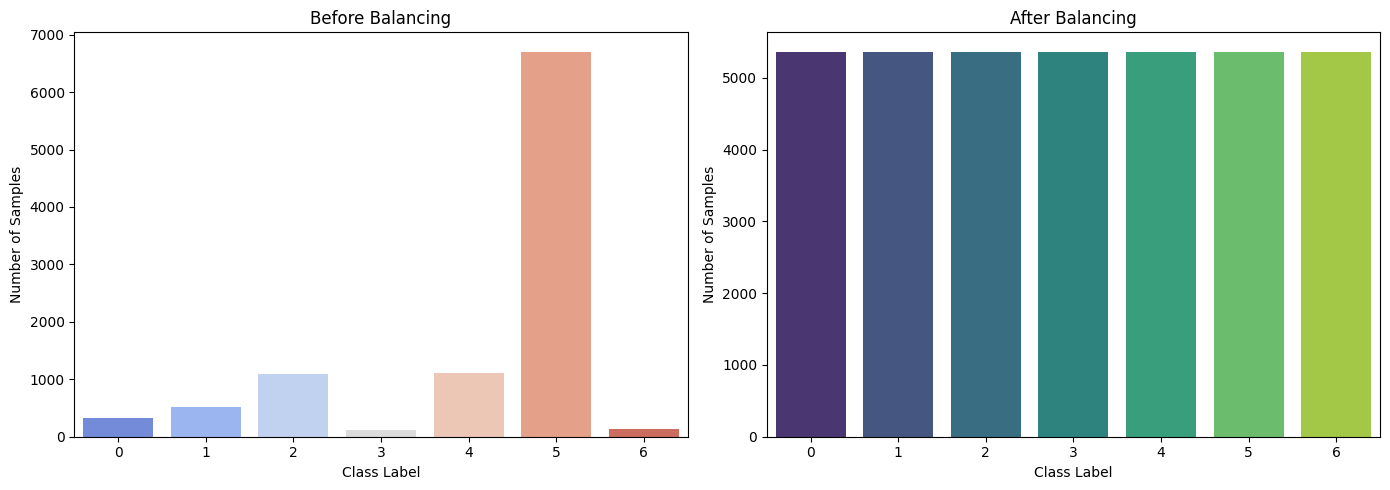

In [48]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you're using a balanced dataframe or generator
# Use train_generator for the balanced dataset to count class samples

# Count original class samples from the dataframe before augmentation
original_counts = dict(Counter(skin_df['label']))

# Count balanced class samples from the generator
# For this, we can use train_generator.classes to get the current class distribution
balanced_counts = dict(Counter(train_generator.classes))

# Plot before and after
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot for original dataset (before balancing)
sns.barplot(x=list(original_counts.keys()), y=list(original_counts.values()), ax=axes[0], palette="coolwarm")
axes[0].set_title("Before Balancing")
axes[0].set_xlabel("Class Label")
axes[0].set_ylabel("Number of Samples")

# Plot for balanced dataset (after augmentation)
sns.barplot(x=list(balanced_counts.keys()), y=list(balanced_counts.values()), ax=axes[1], palette="viridis")
axes[1].set_title("After Balancing")
axes[1].set_xlabel("Class Label")
axes[1].set_ylabel("Number of Samples")

plt.tight_layout()
plt.show()


In [87]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Number of classes
num_classes = len(train_generator.class_indices)

# Load ResNet50 base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  

# Add classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Phase 1: Compile with higher learning rate for training new head
model.compile(optimizer=Adam(learning_rate=0.003), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("resnet50_skin_best.h5", save_best_only=True, monitor="val_accuracy", mode="max")

print("🔁 Phase 1: Training head with frozen base...")
model.fit(train_generator, validation_data=val_generator, epochs=10, callbacks=[early_stop, checkpoint])

# Phase 2: 
print("🔓 Phase 2: Fine-tuning entire model...")

base_model.trainable = True  # Unfreeze all layers

# Recompile with low LR
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Optional: Reduce LR on plateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)

# Fine-tune
history_finetune = model.fit(train_generator, validation_data=val_generator, epochs=10, callbacks=[early_stop, checkpoint, reduce_lr])


🔁 Phase 1: Training head with frozen base...
Epoch 1/10
1174/1174 [==============================] - 309s 262ms/step - loss: 1.9542 - accuracy: 0.1412 - val_loss: 1.9460 - val_accuracy: 0.1429
Epoch 2/10
1174/1174 [==============================] - 307s 262ms/step - loss: 1.9464 - accuracy: 0.1435 - val_loss: 1.9461 - val_accuracy: 0.1429
Epoch 3/10
1174/1174 [==============================] - 311s 265ms/step - loss: 1.9464 - accuracy: 0.1409 - val_loss: 1.9462 - val_accuracy: 0.1429
Epoch 4/10
1174/1174 [==============================] - 308s 263ms/step - loss: 1.9463 - accuracy: 0.1409 - val_loss: 1.9461 - val_accuracy: 0.1429
Epoch 5/10
1174/1174 [==============================] - 306s 260ms/step - loss: 1.9464 - accuracy: 0.1409 - val_loss: 1.9463 - val_accuracy: 0.1429
Epoch 6/10
1174/1174 [==============================] - 306s 260ms/step - loss: 1.9461 - accuracy: 0.1450 - val_loss: 1.9465 - val_accuracy: 0.1429
🔓 Phase 2: Fine-tuning entire model...
Epoch 1/10
1174/1174 [======

In [52]:
from tensorflow.keras.models import load_model
model = load_model('resnet50_skin_best.h5')

print("model load successfully")

model load successfully


In [28]:
import numpy as np

# Predict on validation data
y_pred_prob = model.predict(val_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# True labels
y_true = val_generator.classes

# Class names
class_names = list(val_generator.class_indices.keys())


294/294 [==============================] - 43s 139ms/step


In [30]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99      1341
           1       1.00      0.99      0.99      1341
           2       0.92      0.98      0.95      1341
           3       1.00      1.00      1.00      1341
           4       0.88      0.97      0.92      1341
           5       0.98      0.84      0.90      1341
           6       1.00      1.00      1.00      1341

    accuracy                           0.96      9387
   macro avg       0.97      0.96      0.96      9387
weighted avg       0.97      0.96      0.96      9387



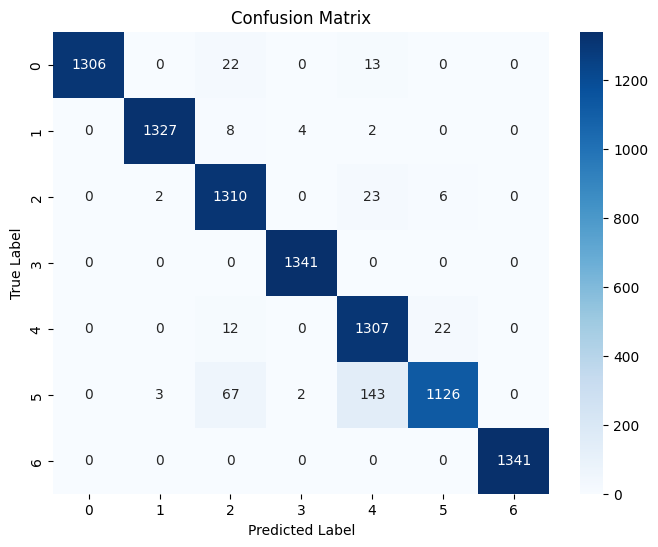

In [31]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


1/1 [==============================] - 4s 4s/step


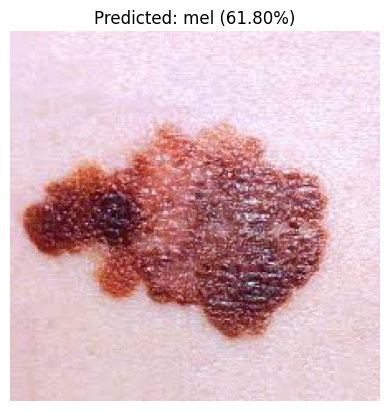

In [26]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

class_labels = labelEncoder.classes_

img_path = r"C:\Users\Admin\Downloads\download (2).jpg"
# Load image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) 
img_array = img_array / 255.0  

# Predict
prediction = model.predict(img_array)
predicted_class = class_labels[np.argmax(prediction)]
confidence = np.max(prediction)

# results
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {predicted_class} ({confidence*100:.2f}%)")
plt.show()

In [27]:
#vgg16

In [28]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Number of classes (use same as ResNet)
num_classes = len(train_generator.class_indices)

# Load VGG16 base model (no top)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # 🔒 Freeze base layers initially

# Add custom head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Phase 1: Train top layers
model.compile(optimizer=Adam(learning_rate=0.003), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("vgg16_skin_best.h5", save_best_only=True, monitor="val_accuracy", mode="max")

print("🔁 Phase 1: Training head with frozen VGG16 base...")
history_phase2 = model.fit(train_generator, validation_data=val_generator, epochs=10, callbacks=[early_stop, checkpoint])

# Phase 2: Fine-tune full model
print("🔓 Phase 2: Fine-tuning entire VGG16 model...")
base_model.trainable = True

model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)

history_finetune2 = model.fit(train_generator, validation_data=val_generator, epochs=10, callbacks=[early_stop, checkpoint, reduce_lr])

🔁 Phase 1: Training head with frozen VGG16 base...
Epoch 1/10
1174/1174 [==============================] - 262s 221ms/step - loss: 1.7499 - accuracy: 0.2959 - val_loss: 1.5300 - val_accuracy: 0.4130
Epoch 2/10
1174/1174 [==============================] - 260s 221ms/step - loss: 1.6498 - accuracy: 0.3476 - val_loss: 1.4832 - val_accuracy: 0.4446
Epoch 3/10
1174/1174 [==============================] - 252s 215ms/step - loss: 1.6109 - accuracy: 0.3648 - val_loss: 1.4368 - val_accuracy: 0.4672
Epoch 4/10
1174/1174 [==============================] - 285s 243ms/step - loss: 1.5930 - accuracy: 0.3728 - val_loss: 1.4391 - val_accuracy: 0.4602
Epoch 5/10
1174/1174 [==============================] - 257s 219ms/step - loss: 1.5773 - accuracy: 0.3800 - val_loss: 1.4115 - val_accuracy: 0.4818
Epoch 6/10
1174/1174 [==============================] - 259s 221ms/step - loss: 1.5691 - accuracy: 0.3819 - val_loss: 1.3896 - val_accuracy: 0.4786
Epoch 7/10
1174/1174 [==============================] - 251s 

In [29]:
import matplotlib.pyplot as plt

# Combine histories
def combine_histories(h1, h2):
    combined = {}
    for key in h1.history.keys():
        combined[key] = h1.history[key] + h2.history[key]
    return combined

combined_history = combine_histories(history_phase2, history_finetune2)


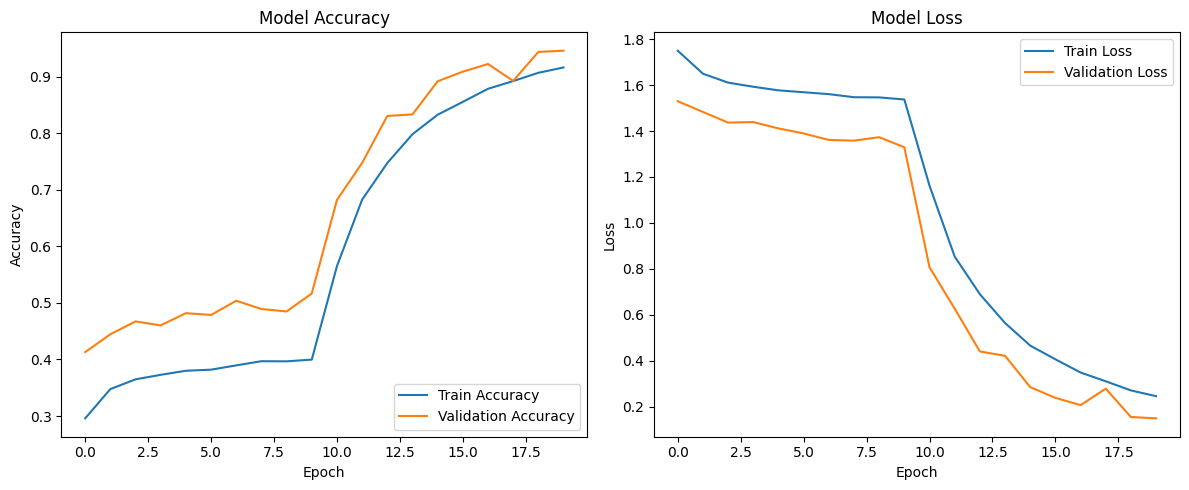

In [30]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(combined_history['accuracy'], label='Train Accuracy')
plt.plot(combined_history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(combined_history['loss'], label='Train Loss')
plt.plot(combined_history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


294/294 [==============================] - 28s 95ms/step
📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1341
           1       0.99      0.99      0.99      1341
           2       0.85      0.93      0.89      1341
           3       0.99      1.00      1.00      1341
           4       0.85      0.92      0.89      1341
           5       0.95      0.82      0.88      1341
           6       1.00      1.00      1.00      1341

    accuracy                           0.95      9387
   macro avg       0.95      0.95      0.95      9387
weighted avg       0.95      0.95      0.95      9387



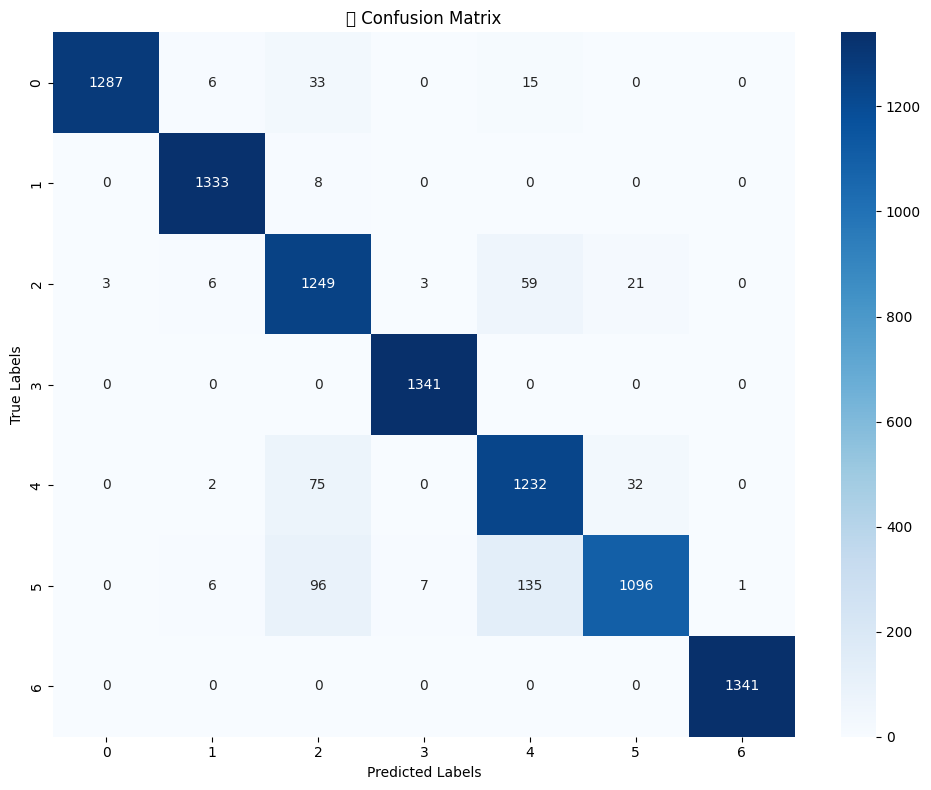

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Predict on the validation set
y_pred_probs = model.predict(val_generator, verbose=1)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Step 2: Get true labels
y_true = val_generator.classes

# Step 3: Class labels mapping
class_labels = list(val_generator.class_indices.keys())

# Step 4: Classification report
print("📋 Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# Step 5: Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Step 6: Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('🔍 Confusion Matrix')
plt.tight_layout()
plt.show()
